# Initial Exploration

First, I load and combine all JSON files into one dataset, excluding non-listening data like the genre map.

In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load your actual Spotify data
data_path = '../data/Spotify Extended Streaming History'
dfs = []

# Load all streaming history JSONs except any unrelated files (like genre map)
for file in os.listdir(data_path):
    if file.endswith('.json') and file != 'artist_genre_map.json':
        dfs.append(pd.read_json(os.path.join(data_path, file)))

# Combine all files into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# Display the first few rows
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2018-06-04T21:16:27Z,"iOS 11.3.1 (iPhone7,2)",5804,US,24.145.6.170,Bodies,Drowning Pool,Sinner,spotify:track:7CpbhqKUedOIrcvc94p60Y,None,...,NaN,NaN,NaN,clickrow,endplay,False,False,False,NaN,False
1,2018-06-04T21:16:30Z,"iOS 11.3.1 (iPhone7,2)",2739,US,24.145.6.170,Clouds Over California,DevilDriver,The Last Kind Words,spotify:track:21WIpZXepY9HA7NDwYiNaM,None,...,NaN,NaN,NaN,clickrow,endplay,False,False,False,NaN,False
2,2018-06-07T21:42:38Z,"iOS 11.3.1 (iPhone7,2)",83011,US,24.145.6.170,Stricken,Disturbed,Ten Thousand Fists,spotify:track:6RJdYpFQwLyNfDc5FbjkgV,None,...,NaN,NaN,NaN,clickrow,logout,False,False,False,NaN,False
3,2018-06-07T21:44:50Z,"iOS 11.3.1 (iPhone7,2)",14091,US,24.145.6.170,Enter Sandman,Metallica,Metallica,spotify:track:5BIMPccDwShpXq784RJlJp,None,...,NaN,NaN,NaN,trackdone,fwdbtn,True,False,False,NaN,False
4,2018-06-07T21:48:20Z,"iOS 11.3.1 (iPhone7,2)",210133,US,24.145.6.170,Testify,Rage Against The Machine,The Battle Of Los Angeles,spotify:track:7lmeHLHBe4nmXzuXc0HDjk,None,...,NaN,NaN,NaN,fwdbtn,trackdone,True,False,False,NaN,False


## Data Cleaning

I convert the timestamp to datetime and extract year, month, and hour to make the data easier to work with. I also rename long column names to simpler ones.

In [55]:
df['ts'] = pd.to_datetime(df['ts'])
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['hour'] = df['ts'].dt.hour

df.rename(columns={'master_metadata_album_artist_name': 'artist', 'master_metadata_track_name': 'track'}, inplace=True)
df.head()

,ts,platform,ms_played,conn_country,ip_addr,track,artist,master_metadata_album_album_name,spotify_track_uri,episode_name,...,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year,month,hour
0,2018-06-04 21:16:27+00:00,"iOS 11.3.1 (iPhone7,2)",5804,US,24.145.6.170,Bodies,Drowning Pool,Sinner,spotify:track:7CpbhqKUedOIrcvc94p60Y,None,...,clickrow,endplay,False,False,False,NaN,False,2018,6,21
1,2018-06-04 21:16:30+00:00,"iOS 11.3.1 (iPhone7,2)",2739,US,24.145.6.170,Clouds Over California,DevilDriver,The Last Kind Words,spotify:track:21WIpZXepY9HA7NDwYiNaM,None,...,clickrow,endplay,False,False,False,NaN,False,2018,6,21
2,2018-06-07 21:42:38+00:00,"iOS 11.3.1 (iPhone7,2)",83011,US,24.145.6.170,Stricken,Disturbed,Ten Thousand Fists,spotify:track:6RJdYpFQwLyNfDc5FbjkgV,None,...,clickrow,logout,False,False,False,NaN,False,2018,6,21
3,2018-06-07 21:44:50+00:00,"iOS 11.3.1 (iPhone7,2)",14091,US,24.145.6.170,Enter Sandman,Metallica,Metallica,spotify:track:5BIMPccDwShpXq784RJlJp,None,...,trackdone,fwdbtn,True,False,False,NaN,False,2018,6,21
4,2018-06-07 21:48:20+00:00,"iOS 11.3.1 (iPhone7,2)",210133,US,24.145.6.170,Testify,Rage Against The Machine,The Battle Of Los Angeles,spotify:track:7lmeHLHBe4nmXzuXc0HDjk,None,...,fwdbtn,trackdone,True,False,False,NaN,False,2018,6,21


## Top 5 Artists Per Year

This chart shows the 5 most listened-to artists each year. I wanted to visualize how my top artists changed over time.

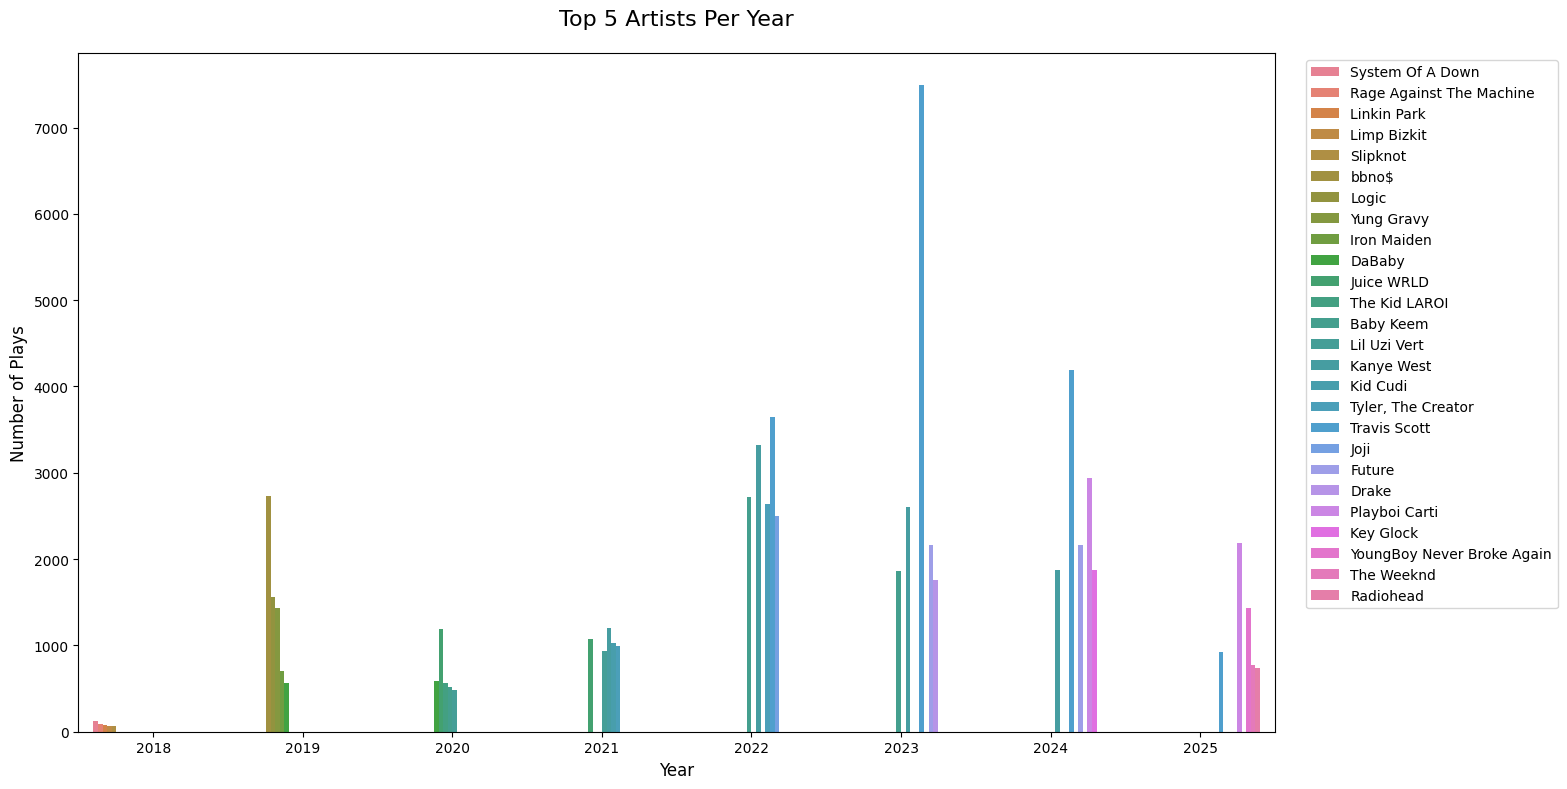

In [56]:
top_artists_per_year = (
    df.groupby(['year', 'artist'])
    .size()
    .reset_index(name='plays')
    .sort_values(['year', 'plays'], ascending=[True, False])
)

# Top 5 per year
top_5_per_year = top_artists_per_year.groupby('year').head(5)

plt.figure(figsize=(16, 8))  # Larger figure for better readability
ax = sns.barplot(
    data=top_5_per_year, 
    x='year', 
    y='plays', 
    hue='artist', 
    dodge=True,
    width=0.8  # Make bars thicker
)

plt.title('Top 5 Artists Per Year', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Make room for legend
plt.show()

- I'm very interested to learn that I didn't really listen to music around 2018, before it shot up around 2022 and onward
- You can see my interest in music go from what my parents listened to, to it starting to branch out to artists I then discovered on my own 

## Total Listening Activity by Year

This chart shows my total number of plays each year to understand how my overall usage changed over time.

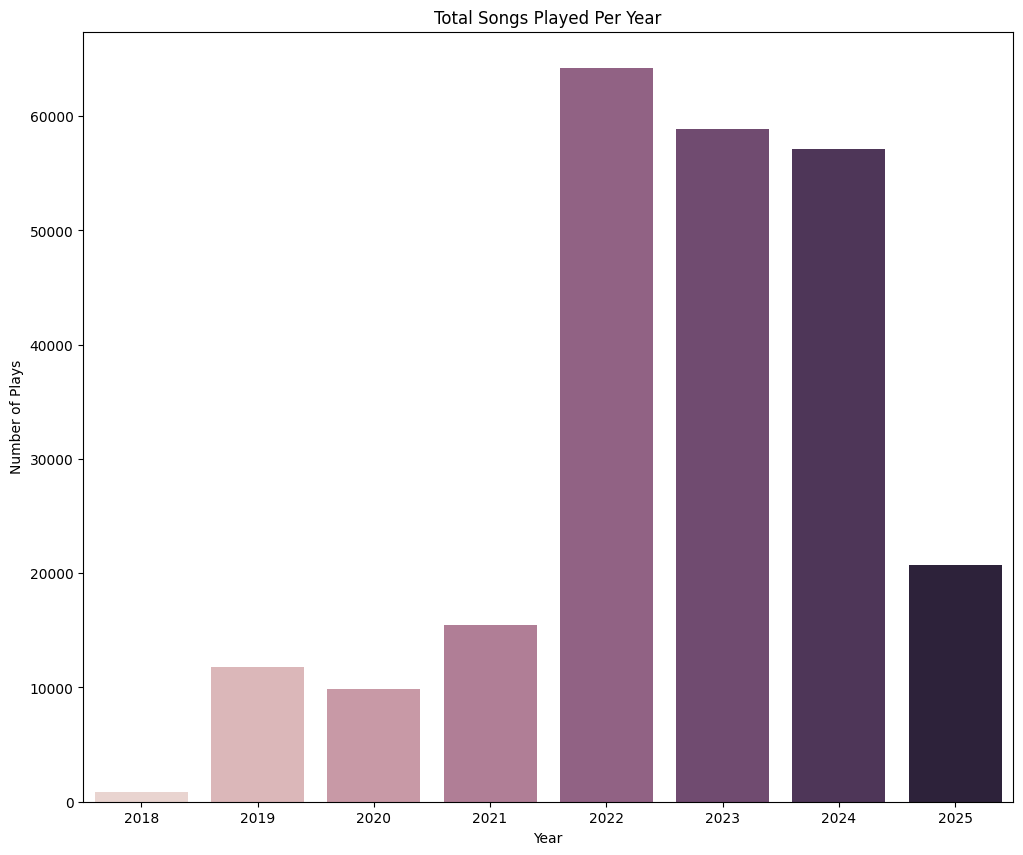

In [57]:
# Calculate yearly plays
yearly_plays = df.groupby('year').size()

plt.figure(figsize=(12, 10))
sns.barplot(x=yearly_plays.index, y=yearly_plays.values, hue=yearly_plays.index, dodge=False, legend=False)
plt.title('Total Songs Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.show()

- This better shows just how much my listening activity boosted greatly around 2022, which is when I was 17 and driving myself around more, getting me more into music

## Top Tracks of All Time

This section reveals the top 10 most played tracks in my entire listening history.

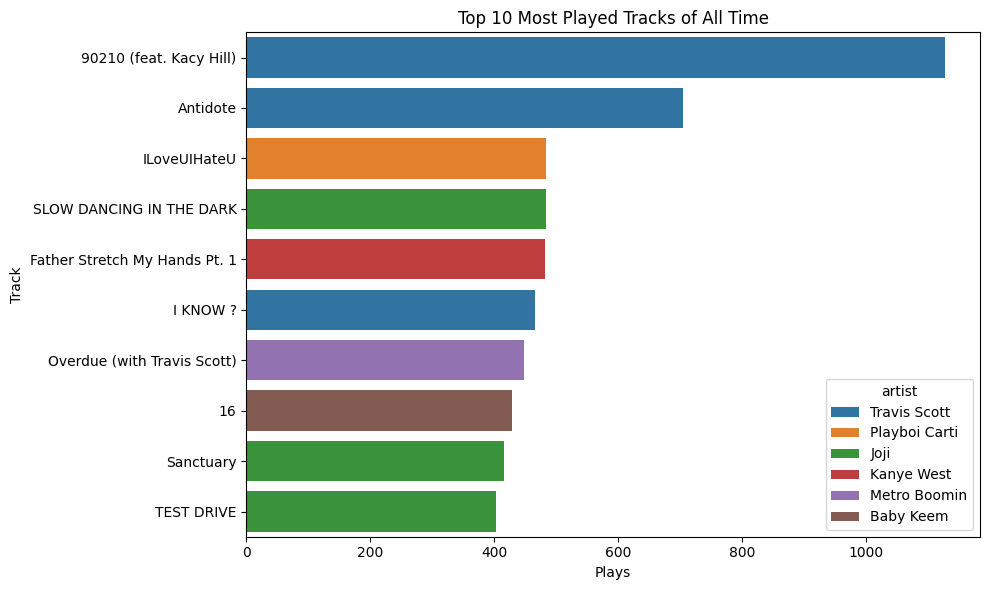

In [58]:
top_tracks = (
    df.groupby(['track', 'artist'])
    .size()
    .reset_index(name='plays')
    .sort_values('plays', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_tracks, y='track', x='plays', hue='artist', dodge=False)
plt.title('Top 10 Most Played Tracks of All Time')
plt.xlabel('Plays')
plt.ylabel('Track')
plt.tight_layout()
plt.show()

- This was an excellent insight to see what I am still listening to after years of logging hours into Spotify
- This chart is a perfect description of what I am typically listening to daily